<a id="top"></a>
# Team 5 Regression Predict Notebook
### Regression Submission: Team_AM5_DSFT_JHB <sup>
<img src="" align="left">

**Team Members:** Ntokozo Thumre, Iddo Smith, Precious Chauke, Makgabo Majadibodu, Willy Ndhlovu  

* [GitHub repo](https://github.com/Iddo-Smith/regression-apples-predict-api-template)
* [API repo]()
* [Trello board](https://trello.com/b/BGO9Rrpv/regressionam5dsft) 

### Table of Contents
---
1. [Introduction](#intro)
 * Project Description
 * Problem Statement
 * Datasets and Variables
---
2. [Load Dependencies](#imports)
---
3. [Data Cleaning](#data)
 * Load Data
 * Handle Missing Data
 * Identifying Outliers
---
4. [Exploratory Data Analysis](#EDA)
 * Data Summary Statistics
 * Univariate Analysis and Visualisation
 * Bivariate Analysis and Visualisation
 * Map Visualisation
---
5. [Data Preprocessing](#preprocessing) 
 * Feature Engineering
 * Split Training Set Into Training and Validation Sets
 * Feature Scaling
 * Feature Selection
 * Encoding Categorical Data

---
6. [Modelling](#modelling)
 * Linear Regression
 * Multiple Linear Regression
 * Polynomial Regression
 * Support Vector Regression
 * Random Forest Regression
 * Lasso Regression
 * Ridge Regression
 * CatBoost Regression
 * XGBoost Regression
 * LightGBM Regression
---
7. [Performance Evaluation](#evaluation)
 * Compare Models on Performance Metrics
 * Evaluate Best Models by Cross Validation
 * Hyperparameter Tuning on Best Models
 * Feature Importance of Best Models
---
8. [Model Analysis](#analysis)
---
9. [Conclusion](#conclusion)
---
10. [Save Model and Output](#save)

<a id="intro"></a>
## 1. Introduction  

### Project Description

Machine learning is a powerful branch of Artificial Intelligence, dating as far back as 1952,  developed to teach computer systems how to make decisions emanated from preexisting data. Mathematical algorithms are applied to training data which allows a machine to identify patterns and make predictions for unseen datasets.

Regression is a popular supervised statistical learning method that aims to predict the value of a dependent variable (y) based on an independent variable (x). The relationship between the variables can be linear or nonlinear.

We are in a fresh producing industry where yields of the golden apples fluctuate by season.
So we want to know if our prices should also change with the seasons?

So contructiong a regresiion algorithm that will accurately predict how much a kilogram of Golden delicious apples will cost?
The solution will improve the customer experience, it will help the business to realize more profit and it will reduce unnecessary costs.
Since we will be able to keep track of how much stock we have on hand ? Not too little that you run out of stock when customers want to buy more, And not too much that food waste occurs




### Problem Statement
Build a regression model that will predict an accurate average price of the Apple of Golden Delicious.


### Datasets and Variables
The dataset provided by EDSA includes Province, Container, Size_Grade, Weight_Kg, Commodities, Date, Low_Price, High_Price, Sales_Total, Total_Qty_Sold, Total_Kg_Sold, Stock_On_Hand, avg_price_per_kg **based on orders made on the Sendy platform**. The challenge is to predict the average price per kilogram of Apples Golden Delicious. The training dataset has 64376 rows which includes other commodities (i.e. APPLE GRANNY SMITH, AVOCADO PINKERTON, TOMATOES-LONG LIFE etc.) while the testing dataset only contains the commodity APPLE GOLDEN DELICIOUS so in our training dataset we have to remove the rows which contain commodities which are not **APPLE GOLDEN DELICIOUS** so that we only train our model to accurately predict the **average price per kiligram** of apple golden delicious. We are looking at a dataset from one of the fresh producing industry in South Africa. 

**train:** The dataset that will be used to train our model  
**test:** The dataset to which we will apply our model so we predict the **avg_price_per_kg**  
**Commodity:** Both our datasets only contain APPLE GOLDEN DELICIOUS.

<a id="imports"></a>
## 2. Load Dependencies

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Other
from scipy import stats
import math
import pickle

# Ignore warnings
import warnings
warnings.simplefilter(action='ignore')

<a id="data"></a>
## 3. Data Cleaning

### Load Data

In [18]:
train = pd.read_csv('https://raw.githubusercontent.com/Iddo-Smith/regression-apples-predict-api-template/main/edsa-apple-prices-challenge/df%20-%20train_set.csv')
test =pd.read_csv('https://raw.githubusercontent.com/Iddo-Smith/regression-apples-predict-api-template/main/edsa-apple-prices-challenge/df%20-%20test_set.csv')
train=train[train['Commodities'].str.contains('APPLE GOLDEN DELICIOUS')]

In [19]:
train.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11
40,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51
69,EASTERN CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50


In [9]:
test.head()

,Index,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
0,1,W.CAPE-BERGRIVER ETC,EC120,1M,12.0,APPLE GOLDEN DELICIOUS,2020-07-09,128.0,136.0,5008.0,38,456.0,0
1,2,W.CAPE-BERGRIVER ETC,M4183,1X,18.3,APPLE GOLDEN DELICIOUS,2020-01-20,220.0,220.0,1760.0,8,146.4,2
2,3,W.CAPE-BERGRIVER ETC,EC120,1S,12.0,APPLE GOLDEN DELICIOUS,2020-08-19,120.0,120.0,720.0,6,72.0,45
3,4,W.CAPE-BERGRIVER ETC,M4183,1M,18.3,APPLE GOLDEN DELICIOUS,2020-05-06,160.0,160.0,160.0,1,18.3,8
4,5,W.CAPE-BERGRIVER ETC,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,140.0,160.0,14140.0,100,1830.0,19


###  Target variable

In [10]:
# List columns not present in the test dataset
[name for name in train.columns if name not in test.columns]

['avg_price_per_kg']

Our target variable for this project is 'avg_price_per_kg' (R/kg), therefore it is not included in our testing set.

### Handle Missing Data

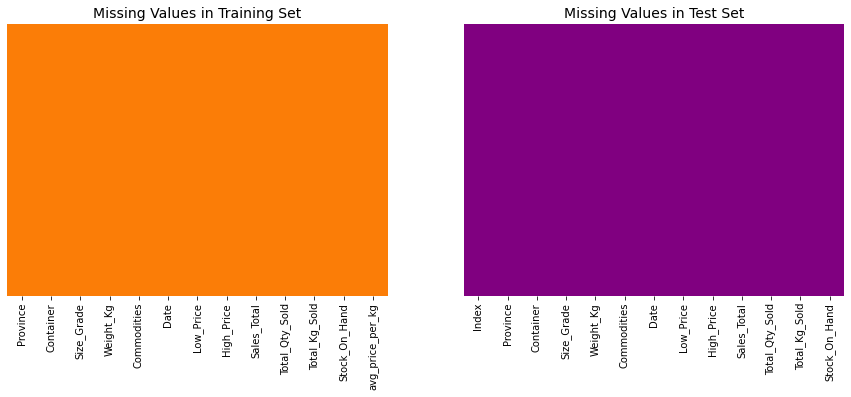

,% missing training set,% missing testing set
Commodities,0.0,0.0
Container,0.0,0.0
Date,0.0,0.0
High_Price,0.0,0.0
Low_Price,0.0,0.0


In [12]:
# Check columns for missing values
fig,axis = plt.subplots(ncols=2, figsize=(15, 5))

#Training set
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap=['#fb7d07','purple'],ax=axis[0])
axis[0].set_title('Missing Values in Training Set',fontsize=14)
#Testing set
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap=['purple','#fb7d07'],ax=axis[1])
axis[1].set_title('Missing Values in Test Set',fontsize=14)

plt.show()

# Calculate percentage missing values
train = round((train.isnull().sum()/train.isnull().count())*100,2)
test = round((test.isnull().sum()/test.isnull().count())*100,2)
d = {'% missing training set': train, '% missing testing set': test}
pd.DataFrame(data=d).sort_values(by='% missing training set',ascending=False).head()

**Dealing with missing data:**
* Fortunately our data has no missing data, so that will make things easy for us.


### Identifying Outliers
Outliers are values which deviate immensely from other observations. It is important to identify outliers because the performance of many algorithms is sensitive to them, leading to inaccurate models and consequently poor predictions.

#### Outliers in our Training data

<AxesSubplot:ylabel='avg_price_per_kg'>

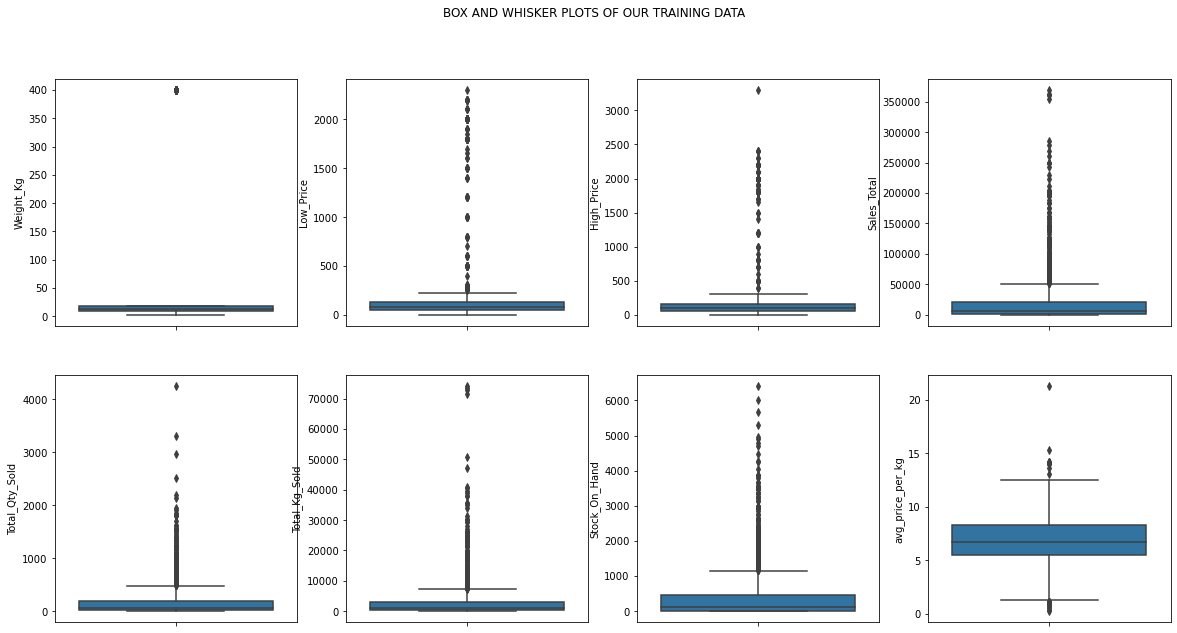

In [29]:
fig, axes = plt.subplots(2, 4, figsize=(20,10))
fig.suptitle('BOX AND WHISKER PLOTS OF OUR TRAINING DATA')
sns.boxplot(ax = axes[0, 0], data=train, y='Weight_Kg')
sns.boxplot(ax = axes[0, 1], data=train, y='Low_Price')
sns.boxplot(ax = axes[0, 2], data=train, y='High_Price')
sns.boxplot(ax = axes[0, 3], data=train, y='Sales_Total')
sns.boxplot(ax = axes[1, 0], data=train, y='Total_Qty_Sold')
sns.boxplot(ax = axes[1, 1], data=train, y='Total_Kg_Sold')
sns.boxplot(ax = axes[1, 2], data=train, y='Stock_On_Hand')
sns.boxplot(ax = axes[1, 3], data=train, y='avg_price_per_kg')
#sns.boxplot(ax = axes[1, 4], data=train, y='Weight_Kg')

#### Outliers in our Testing data

<AxesSubplot:ylabel='Stock_On_Hand'>

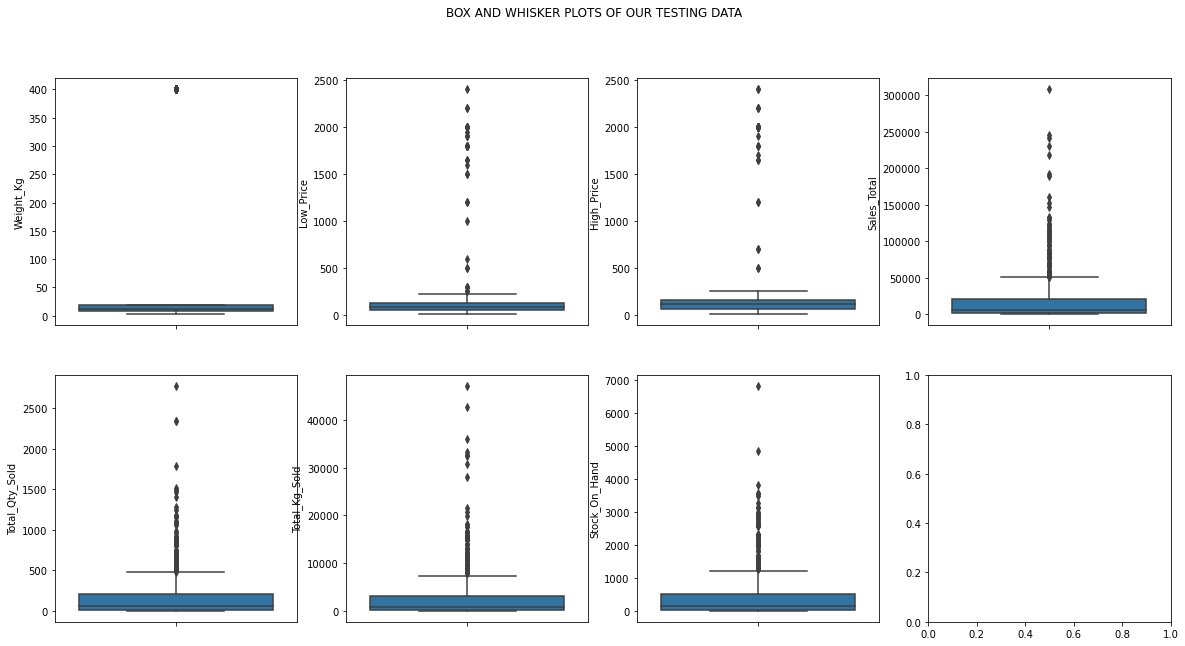

In [32]:
fig, axes = plt.subplots(2, 4, figsize=(20,10))
fig.suptitle('BOX AND WHISKER PLOTS OF OUR TESTING DATA')
sns.boxplot(ax = axes[0, 0], data=test, y='Weight_Kg')
sns.boxplot(ax = axes[0, 1], data=test, y='Low_Price')
sns.boxplot(ax = axes[0, 2], data=test, y='High_Price')
sns.boxplot(ax = axes[0, 3], data=test, y='Sales_Total')
sns.boxplot(ax = axes[1, 0], data=test, y='Total_Qty_Sold')
sns.boxplot(ax = axes[1, 1], data=test, y='Total_Kg_Sold')
sns.boxplot(ax = axes[1, 2], data=test, y='Stock_On_Hand')
#sns.boxplot(ax = axes[1, 3], data=test, y='avg_price_per_kg')
#sns.boxplot(ax = axes[1, 4], data=train, y='Weight_Kg')

In [21]:
train.columns

Index(['Province', 'Container', 'Size_Grade', 'Weight_Kg', 'Commodities',
       'Date', 'Low_Price', 'High_Price', 'Sales_Total', 'Total_Qty_Sold',
       'Total_Kg_Sold', 'Stock_On_Hand', 'avg_price_per_kg'],
      dtype='object')

<a id="EDA"></a>
## 4. Exploratory Data Analysis

### Data Summary Statistics

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 1 to 64310
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province          1952 non-null   object 
 1   Container         1952 non-null   object 
 2   Size_Grade        1952 non-null   object 
 3   Weight_Kg         1952 non-null   float64
 4   Commodities       1952 non-null   object 
 5   Date              1952 non-null   object 
 6   Low_Price         1952 non-null   float64
 7   High_Price        1952 non-null   float64
 8   Sales_Total       1952 non-null   float64
 9   Total_Qty_Sold    1952 non-null   int64  
 10  Total_Kg_Sold     1952 non-null   float64
 11  Stock_On_Hand     1952 non-null   int64  
 12  avg_price_per_kg  1952 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 213.5+ KB


In [34]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685 entries, 0 to 684
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           685 non-null    int64  
 1   Province        685 non-null    object 
 2   Container       685 non-null    object 
 3   Size_Grade      685 non-null    object 
 4   Weight_Kg       685 non-null    float64
 5   Commodities     685 non-null    object 
 6   Date            685 non-null    object 
 7   Low_Price       685 non-null    float64
 8   High_Price      685 non-null    float64
 9   Sales_Total     685 non-null    float64
 10  Total_Qty_Sold  685 non-null    int64  
 11  Total_Kg_Sold   685 non-null    float64
 12  Stock_On_Hand   685 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 69.7+ KB


In [35]:
train.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,40.460912,174.307377,215.648053,20053.533811,174.510758,2960.176332,408.393955,6.778893
std,99.655169,373.553578,433.546159,39005.069445,308.810797,6097.416527,724.450582,2.248744
min,3.000000,2.000000,5.000000,5.000000,1.000000,3.000000,0.000000,0.250000
25%,9.000000,50.000000,60.000000,1325.000000,12.000000,219.600000,9.000000,5.460000
50%,12.000000,80.000000,108.000000,5495.000000,64.000000,853.500000,126.500000,6.670000
75%,18.300000,127.250000,160.000000,21082.500000,200.000000,3093.525000,468.000000,8.280000
max,400.000000,2300.000000,3300.000000,369464.000000,4237.000000,74000.000000,6400.000000,21.240000


In [36]:
test.describe()

,Index,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
count,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000
mean,343.000000,34.142482,164.202891,195.590073,18788.111212,174.883212,2725.402336,439.245255
std,197.886752,87.575995,355.167319,389.109476,33951.586813,299.351142,5059.123311,715.985761
min,1.000000,3.000000,10.000000,10.000000,10.000000,1.000000,6.300000,0.000000
25%,172.000000,9.000000,50.000000,64.000000,1300.000000,13.000000,204.000000,20.000000
50%,343.000000,12.000000,80.000000,112.000000,5520.000000,62.000000,860.100000,153.000000
75%,514.000000,18.300000,128.000000,160.000000,21176.000000,200.000000,3033.000000,516.000000
max,685.000000,400.000000,2400.000000,2400.000000,308010.000000,2774.000000,47200.000000,6827.000000


### Univariate Analysis and Visualisation

### Bivariate Analysis and Visualisation

<a id="preprocessing"></a>
## 5. Data Preprocessing

<a id="modelling"></a>
## 6. Modelling

### Linear Regression

Simple linear regression is a statistical method that shows the relationship between two continuous variables. This is represented by a straight line with the equation:
$$ y = a + bx$$   
where $a$ is the intercept of the line with the y-axis, and $b$ is the gradient.  
The independent variable ($x$) is also known as the **predictor** and the dependent variable ($y$) is known as the **target**.

### Multiple Linear Regression

Multiple linear regression is an extension of simple linear regression. Instead of using one independent variable to predict the target variable, two or more independent variables are used. The multiple linear regression equation is:


$$Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_nX_n$$

<a id="evaluation"></a>
## 7. Performance Evaluation

### Compare Models on Performance Metrics

We can compare the performance of each of our models using two statistical measures that determine the average squared difference between the estimated values and the actual value (**MSE**) and the proportion of variance explained by the model (**R2**):  

**Mean Squared Error (MSE):**  
$$MSE = \frac{1}{n}\sum_{i=1}^n(y_i-\hat{y}_i)^2$$   
   
**R-squared (R2):**
$$R^2 = 1 - \frac{\sum(y_i-\hat{y}_i)^2}{\sum(y_i-\bar{y})^2}$$  

For this project, we will be looking at the root mean squared error (RMSE). The lower the RMSE of the model, the better the regression line fits the data.